# Задача 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def L_p(v, p):
  return (np.sum(abs(v)**p))**(1/p)

def Norm(M, p):
  n, _ = np.shape(M)
  norm = np.zeros(1000)
  for i in range(1000):
    v = np.random.uniform( -1, 1, (n,1))/L_p(np.random.uniform( -1, 1, (n,1)),p)
    norm[i] = L_p(M@v,p)
  return np.max(norm)

def cond(M, p):
  n,_ = np.shape(M)
  if np.linalg.matrix_rank(M) != n:
    return np.infty
  else:
    return Norm(M,p) * Norm(np.linalg.inv(M),p)

M = 10*np.random.random([10,10])
M = M.astype("int")
print("Матрица:\n",M,"\n")
print("Реализация:",Norm(M, 2),cond(M,2))
print("Numpy:",np.linalg.norm(M, 2),np.linalg.cond(M))

Матрица:
 [[3 2 7 8 0 1 3 2 1 7]
 [9 3 5 3 2 5 9 6 0 2]
 [9 1 4 4 8 1 9 4 0 5]
 [0 8 2 8 6 0 8 8 1 3]
 [6 4 1 3 3 8 0 4 0 9]
 [9 0 9 4 6 1 5 9 9 8]
 [3 5 8 8 2 5 3 2 3 6]
 [8 5 6 3 9 0 3 5 1 1]
 [3 8 1 1 3 8 4 6 0 9]
 [8 6 0 8 4 7 8 8 7 9]] 

Реализация: 51.73868689170036 52.98096068922168
Numpy: 47.91025907054913 31.229533964049594


# Задача 2

In [2]:
n = 3
M = 10*np.random.random((n,n))
M = M.astype("int")
M

array([[6, 3, 4],
       [5, 5, 0],
       [0, 1, 9]])

In [3]:
def L2(M):
    return (np.max(np.linalg.eigvals(M.T @ M)))**0.5

def Frobenius(M):
    u, s, vh = np.linalg.svd(M)
    return np.sum(s ** 2) ** 0.5

Кажется отношение такое:  1.1541477171328662


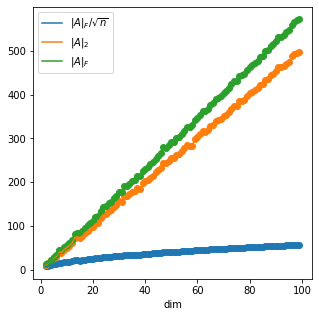

In [4]:

vals = np.zeros(3)
for i in range(100):
    vals += np.array([1/np.sqrt(n) * Frobenius(M), L2(M), Frobenius(M)])/100

for n in range(3, 100):
    M = 10*np.random.random((n,n))
    v = np.zeros(3)
    for i in range(100):
        v += np.array([1/np.sqrt(n) * Frobenius(M), L2(M), Frobenius(M)])/100
    vals = np.vstack([vals, v])

x = [2] + list(range(3, 100))
y1 = vals[:, 0]
y2 = vals[:, 1]
y3 = vals[:, 2]

coefs1 = np.polyfit(x,y1,1)
coefs2 = np.polyfit(x,y2,1)
coefs3 = np.polyfit(x,y3,1)

print("Кажется отношение такое: ",coefs3[0]/coefs2[0])

fig, ax = plt.subplots(1,1,figsize=(5, 5))
plt.plot(x, y1, label="$\|A\|_F/\\sqrt{n}$")
plt.scatter(x, y1)
plt.plot(x, y2, label="$\|A\|_2$")
plt.scatter(x, y2)
plt.plot(x, y3, label="$\|A\|_F$")
plt.scatter(x, y3)
plt.legend()
plt.xlabel("dim")
plt.show()

# Задача 3

In [5]:
dim = 3
M = np.random.random((dim, dim))
A = M.T @ M
M = np.linalg.cholesky(A)

def Cholesky(A):
    M = np.linalg.cholesky(A)
    z = np.random.normal(0, 1, (dim, 10000))
    
    m = [np.cov((M @ z)[0], (M @ z)[1])[0][0],np.cov((M @ z)[0], (M @ z)[1])[1][1],np.cov((M @ z)[1], (M @ z)[2])[1][1]]
    x = [m[0]+(M @ z)[0][0],m[1]+(M @ z)[1][1],m[2]+(M @ z)[2][2]]
    return x

x = np.array(dim)
x = Cholesky(A)
print(x)

[3.304142012886559, -0.6900389668581501, 1.4927383216894512]


# Задача 4

In [25]:
def Move(M1, M2):
    v1_bar = np.mean(M1, axis=0)
    v2_bar = np.mean(M2, axis=0)
    M1_new = M1 - np.mean(M1, axis=0)
    M2_new = M2 - np.mean(M2, axis=0)
    
    u, s, vh = np.linalg.svd(M1_new.T @ M2_new)

    R = u @ vh
    mu = np.mean(M2, axis=0) - R.T @ np.mean(M1, axis=0)
    
    M1_im = M1@R+mu

    x1,y1, x2, y2, x1_im, y1_im = M1[:, 0], M1[:, 1], M2[:, 0], M2[:, 1], M1_im[:, 0], M1_im[:, 1]

    fig, axs = plt.subplots(1, 2, figsize=(8, 4))

    axs[0].scatter(x1, y1)
    axs[0].scatter(x2, y2)
    axs[1].scatter(x1_im, y1_im)
    axs[1].scatter(x2, y2)

    plt.show()

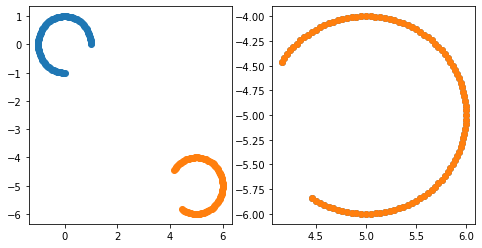

In [26]:
phi = np.linspace(0, 3/2 * np.pi, 100)
x1 = np.cos(phi)
y1 = np.sin(phi)
M1 = np.vstack([x1, y1]).T

phi = np.linspace(np.pi+1, 5/2 * np.pi+1, 100)
x2 = np.cos(phi)+5
y2 = np.sin(phi)-5
M2 = np.vstack([x2, y2]).T

Move(M1, M2)

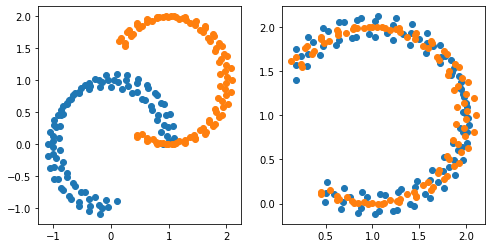

In [30]:
phi = np.linspace(0, 3/2 * np.pi, 100)
x1 = np.cos(phi) + np.cos(100 * phi)/10 
y1 = np.sin(phi)+ np.cos(100 * phi)/10
M1 = np.vstack([x1, y1]).T

phi = np.linspace(np.pi+1, 5/2 * np.pi+1, 100)
x2 = np.cos(phi) + np.cos(100 * phi)/10 + 1
y2 = np.sin(phi) + 1
M2 = np.vstack([x2, y2]).T

Move(M1, M2)

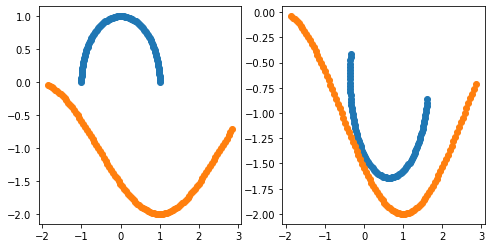

In [31]:
phi = np.linspace(0, 1 * np.pi, 100)
x1 = np.cos(phi) 
y1 = np.sin(phi)
M1 = np.vstack([x1, y1]).T

phi = np.linspace(np.pi, 5/2 * np.pi, 100)
x2 = phi-5
y2 = np.sin(phi+5) -1
M2 = np.vstack([x2, y2]).T

Move(M1, M2)